<a href="https://colab.research.google.com/github/net39/ML-anomaly-detection/blob/main/P2_01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Readiness

In [62]:
!pip install --quiet google-cloud-storage opencv-python-headless pandas matplotlib seaborn

from google.cloud import storage
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO




In [65]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
files.upload()

from google.cloud import storage
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/p2-anomaly-c4545180e308.json'

storage_client = storage.Client()
bucket_name = 'p2-anomaly'
bucket = storage_client.bucket(bucket_name)

Mounted at /content/drive


Saving p2-anomaly-c4545180e308.json to p2-anomaly-c4545180e308 (2).json


# Images - Training Set

In [49]:
blob = bucket.blob('raw/images/Training_set.csv')
content = blob.download_as_text()

from io import StringIO
train_df = pd.read_csv(StringIO(content))
train_df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [50]:
# Number of classes and images
print("Unique labels:", train_df['label'].nunique())
print("Total images:", len(train_df))

Unique labels: 15
Total images: 12600


In [51]:
# Check class distribution
train_df['label'].value_counts()

,count
label,
sitting,840
using_laptop,840
hugging,840
sleeping,840
drinking,840
clapping,840
dancing,840
cycling,840
calling,840


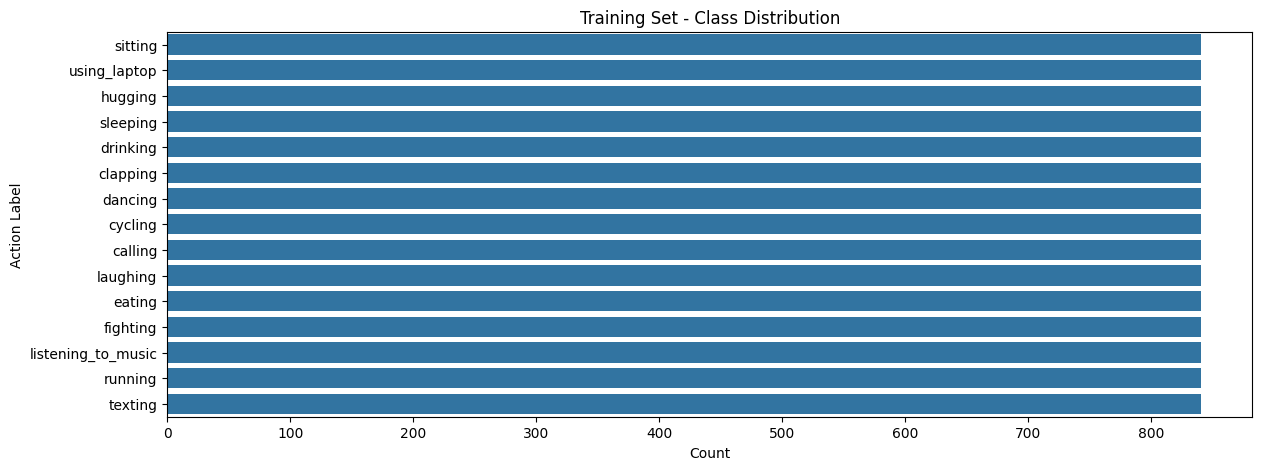

In [52]:
# Visualise class balance
plt.figure(figsize=(14,5))
sns.countplot(y='label', data=train_df, order=train_df['label'].value_counts().index)
plt.title('Training Set - Class Distribution')
plt.xlabel('Count')
plt.ylabel('Action Label')
plt.show()

In [53]:
# Null entries check
train_df.isnull().sum()

,0
filename,0
label,0


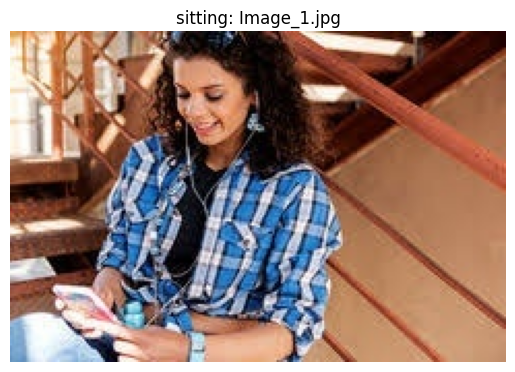

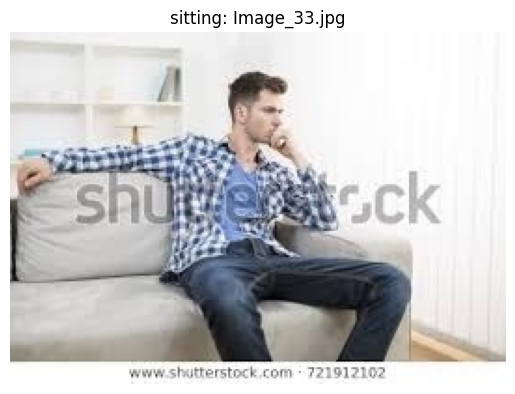

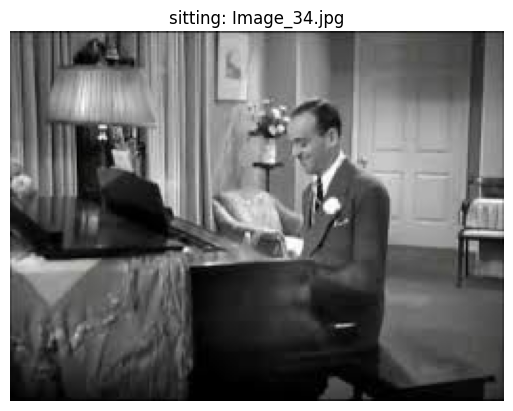

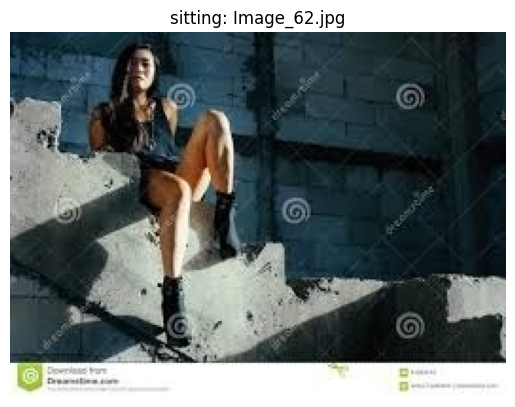

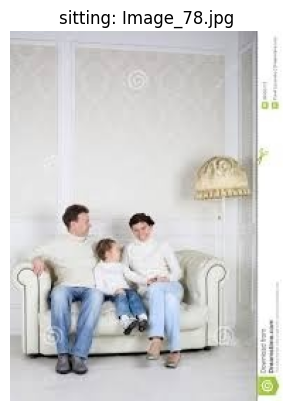

In [54]:
# Sample images per label
def show_images(label, n=5):
    files = train_df[train_df['label'] == label]['filename'].head(n).tolist()
    for fname in files:
        try:
            img_blob = bucket.blob(f'raw/images/train/{fname}')
            img_bytes = img_blob.download_as_bytes()
            img_arr = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)
            img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            plt.imshow(img_arr)
            plt.title(f'{label}: {fname}')
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error loading image {fname}: {e}")

# Example usage
show_images('sitting')

In [55]:
def check_image_shapes(n=100):
    sample_files = train_df.sample(n)['filename'].tolist()
    shapes = []
    for fname in sample_files:
        try:
            img_blob = bucket.blob(f'raw/images/train/{fname}')
            img_bytes = img_blob.download_as_bytes()
            img_arr = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)
            shapes.append(img_arr.shape)
        except:
            continue
    print("Image shapes distribution:", pd.Series(shapes).value_counts())

check_image_shapes(200)

Image shapes distribution: (183, 275, 3)    42
(168, 300, 3)    14
(194, 259, 3)    12
(275, 183, 3)    10
(183, 276, 3)     7
                 ..
(162, 310, 3)     1
(201, 250, 3)     1
(185, 273, 3)     1
(310, 162, 3)     1
(149, 339, 3)     1
Name: count, Length: 80, dtype: int64


# Images - Testing Set

In [56]:
blob = bucket.blob('raw/images/Testing_set.csv')
content = blob.download_as_text()

from io import StringIO
test_df = pd.read_csv(StringIO(content))
test_df.head()

# Number of images
print("Total images:", len(test_df))


Total images: 5400


In [57]:
# Null entries check
test_df.isnull().sum()

,0
filename,0


In [58]:
def check_image_shapes(n=100):
    sample_files = test_df.sample(n)['filename'].tolist()
    shapes = []
    for fname in sample_files:
        try:
            img_blob = bucket.blob(f'raw/images/test/{fname}')
            img_bytes = img_blob.download_as_bytes()
            img_arr = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)
            shapes.append(img_arr.shape)
        except:
            continue
    print("Image shapes distribution:", pd.Series(shapes).value_counts())

check_image_shapes(200)

Image shapes distribution: (183, 275, 3)    41
(168, 300, 3)    15
(275, 183, 3)    14
(194, 259, 3)    10
(192, 263, 3)     8
                 ..
(177, 284, 3)     1
(265, 190, 3)     1
(184, 274, 3)     1
(171, 295, 3)     1
(262, 193, 3)     1
Name: count, Length: 63, dtype: int64


# Upload Notebook to GCS

In [68]:
!cp "/content/drive/MyDrive/Colab Notebooks/P2-01_EDA.ipynb" "/content/P2-01_EDA.ipynb"

client = storage.Client(project='p2-anomaly')
bucket = client.bucket('p2-anomaly')
notebook_blob = bucket.blob('notebooks/P2-01_EDA.ipynb')
notebook_blob.upload_from_filename('/content/P2-01_EDA.ipynb')
print("Pushed to GCS.")

Pushed to GCS.
